<a href="https://colab.research.google.com/github/amnasyed1/507_regression/blob/main/wine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ucimlrepo

In [7]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [4]:
# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
df = wine.data.features
df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
# Fit the regression model
X = sm.add_constant(df['Alcohol'])  # Adds a constant term to the predictor
print(X)
model = sm.OLS(df['Flavanoids'], X)
print (model)
## X = independent varibale, dependent varibale is Flavanoids

     const  Alcohol
0      1.0    14.23
1      1.0    13.20
2      1.0    13.16
3      1.0    14.37
4      1.0    13.24
..     ...      ...
173    1.0    13.71
174    1.0    13.40
175    1.0    13.27
176    1.0    13.17
177    1.0    14.13

[178 rows x 2 columns]


In [10]:
results = model.fit()
# Print summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Flavanoids   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     10.46
Date:                Wed, 25 Oct 2023   Prob (F-statistic):            0.00146
Time:                        23:40:51   Log-Likelihood:                -246.73
No. Observations:                 178   AIC:                             497.5
Df Residuals:                     176   BIC:                             503.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7588      1.174     -1.498      0.1

- dependent varibale: flavanoids
- model type: ols
- df = degrees of freedom
- adj. r-squared: 0.051 --> it has a weak relationship; and that 5% of the variance we might see in flavanoid level can be attributed to alcohol. Meaning alcohol is not a strong predictor of flavanoid related stuff
- constant: is the intercept
- Alcholol: p val of .001--> there is a statistical realtionship (weak correlation)
-coef = coefficient
- 0.025: CI (confidence interval)
- 0.975: CI (confidence interval)
- ex) 1 value change in alcohol will lead to a .2914 change?
- F-Statistic: 0.001 telling us there is a statisitcally significant relationship
- Alcohol can be a predictor for flavanoid level


In [11]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

# comes from the statsmodel.stats.diagnostic

Rainbow Test: stat=2.3899371469856194, p-value=3.0882100589536056e-05


In [12]:
residuals = results.resid
fitted = results.fittedvalues

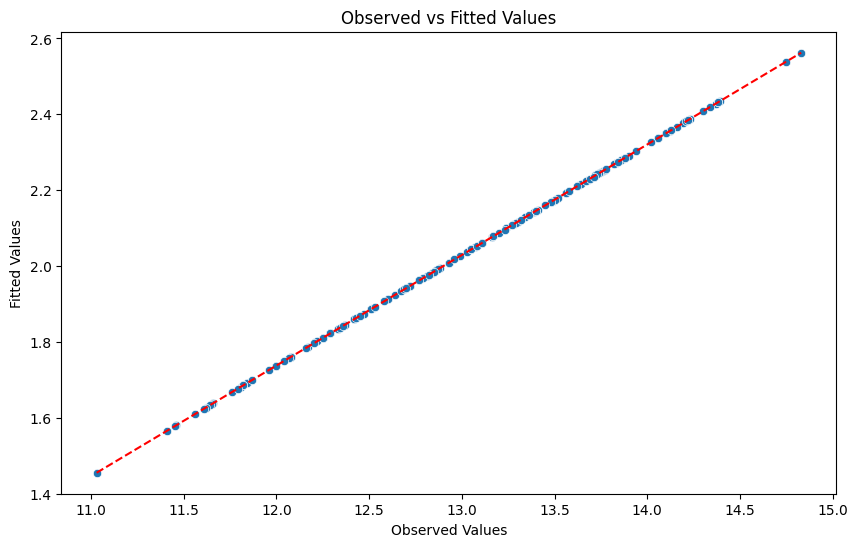

In [13]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Alcohol'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['Alcohol']), max(df['Alcohol'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [14]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9456958174705505, p-value=2.636219278429053e-06
